In [2]:
import numpy as np 
import pandas as pd 

data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Checking for inconsistency in the dataset 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data Visualization 

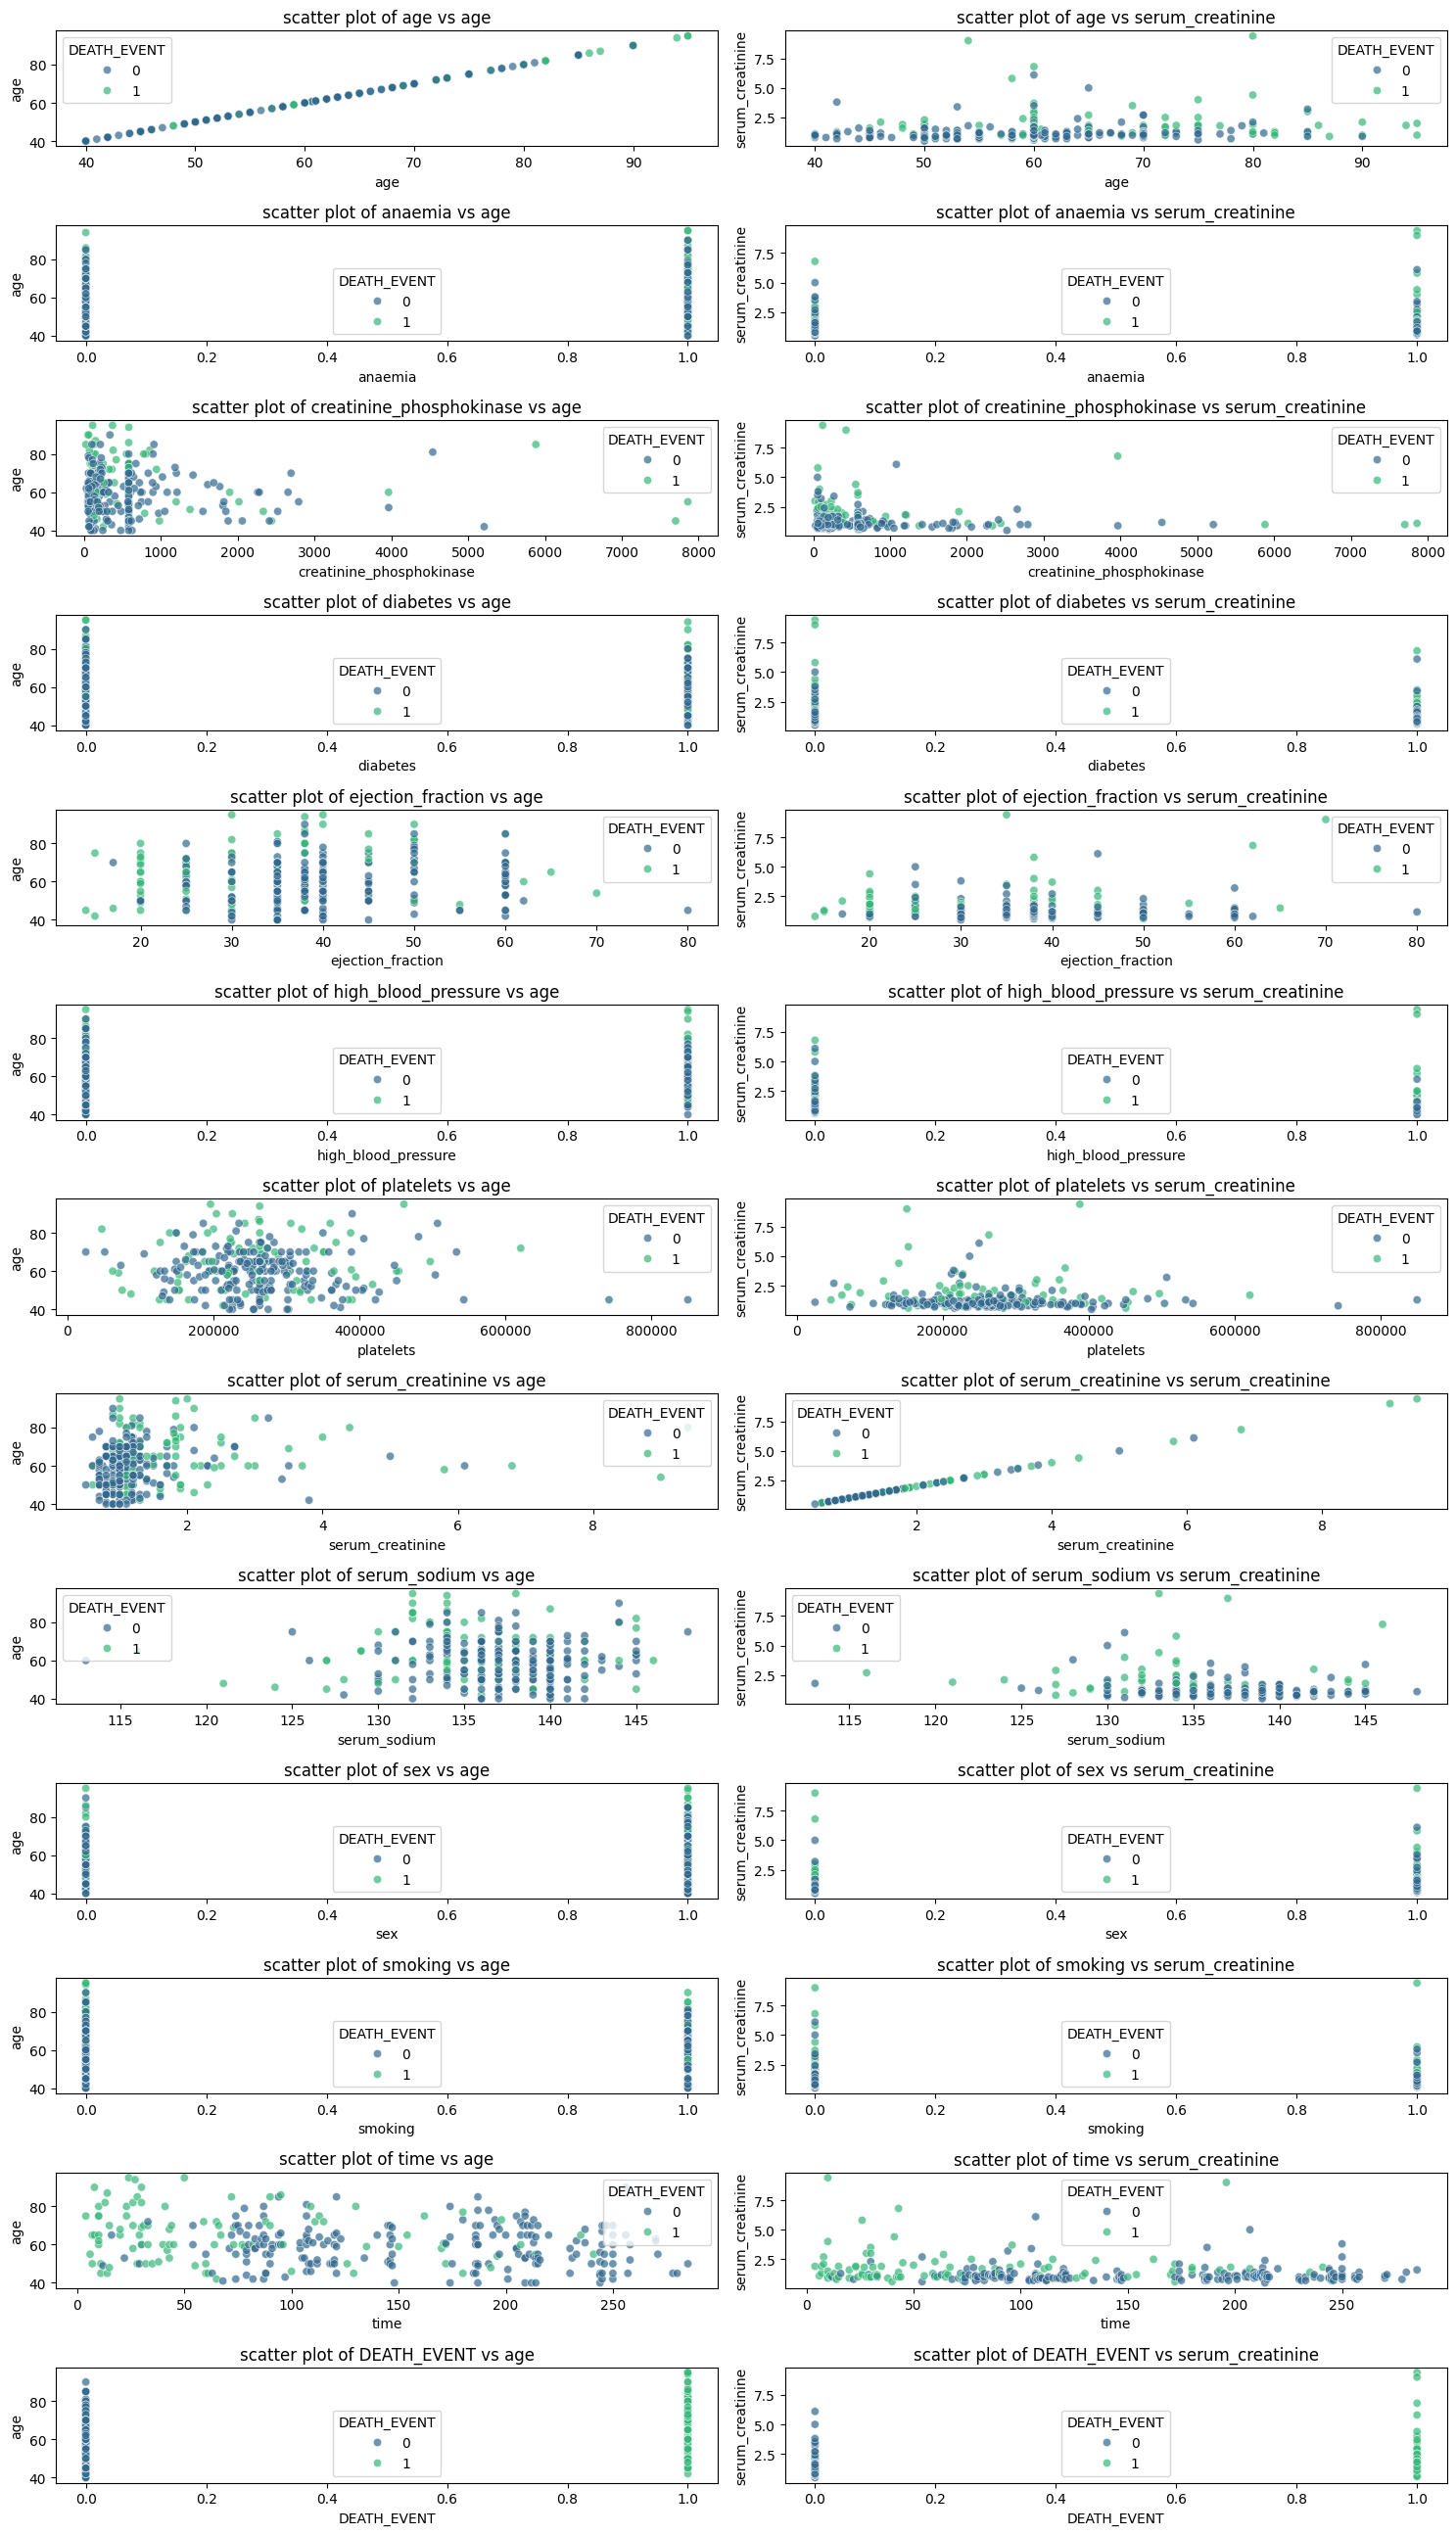

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

#select features for the scatter plot 
selected_features = ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure",
                     "platelets","serum_creatinine","serum_sodium","sex","smoking","time","DEATH_EVENT"]

#create a figure to contain the subplotes 
    #----------------Axes = 0-------------------------#
fig, axes = plt.subplots(ncols = 2,
                         nrows = len(selected_features),
                         figsize = (15, 2*len(selected_features)))

for i, feature in enumerate(selected_features):
    sns.scatterplot(x = feature, y = "age", hue = "DEATH_EVENT",
                    data = data_df, ax = axes[i,0], 
                    palette = "viridis", alpha = 0.7)
    
    axes[i,0].set_title(f'scatter plot of {feature} vs age')
    axes[i,0].set_xlabel(feature)
    axes[i,0].set_ylabel("age")

    #----------------Axes = 1-------------------------#
    sns.scatterplot(x = feature, y = "serum_creatinine", hue = "DEATH_EVENT",
                    data = data_df, ax = axes[i,1], 
                    palette = "viridis", alpha = 0.7)
    
    axes[i,1].set_title(f'scatter plot of {feature} vs serum_creatinine')
    axes[i,1].set_xlabel(feature)
    axes[i,1].set_ylabel("serum_creatinine")

plt.tight_layout()
plt.show()





## Support Vector Machine (SVM)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Prepare the data for SVM 
X = data_df[selected_features]
y = data_df["DEATH_EVENT"]

#Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 40)

#Create SVM Model 
model = SVC()

#train the model 
model.fit(X_train,y_train)

#Evaluate the model 
accuracy = model.score(X_test,y_test)
print(f'SVM Accuracy: {accuracy:.2f}')

#New Prediction over random sample from dataframe 
random_sample	=	data_df[selected_features].sample(n=1,	random_state=42)
new_pred = model.predict(random_sample)
print("Prediction of DEATH EVENT:", new_pred[0])

SVM Accuracy: 0.67
Prediction of DEATH EVENT: 0


In [ ]:
df = 